# DIGHUM101

## The Twilight Saga: The Reason for Criticisms
![nn](twilight.jpeg)

### Introduction

As a 90’s kid, if someone asks me what was the most surprising pop culture phenomenon, I would answer the “Twilight Saga” without any hesitation (Actually, I might debate between this and Justin Bieber). It is an undeniable fact that the Twilight series was a huge success. The commercial success and the fever of this particular pop literature was incredible. However, I had not read the book until my good friend once told me to read it if I want to criticize. No offense to the Twilight fans, but it was a horrible thing from my perspective even though I was not so fluent in English back then. Many literary critics thankfully agree with me, and there are quite a lot of criticisms Stephenie Meyer faces regarding this series. The reasons for these criticisms are mostly because of Meyer’s poor writing, lack of sentimental descriptions, underdeveloped characters and reasonings for their behaviors, and just bad plots. Here, the goal of this project is to investigate this series to figure out what is wrong with it, and what made it so popular, using literary analysis tools.

### Research Question

Since it is not clear what makes the readers/critics happy or enraged about this series, the project will analyze this literature from many aspects. However, computational literary analysis (CLS) has some limitations, this project would approach the answer from what CLS is capable of. This project would do basic literary analysis based on the repetition of vocabularies in it, and also sentiment analysis. Due to its incredible popularity, there are some studies done, which makes this approach not completely novel, but as all DH humanists do, I acknowledge the need for editorial stringency, and I am hoping this would lead to a slightly different conclusion from what other scholars have displayed. 

## 1. Importing tools

In [114]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Data Cleaning
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from string import punctuation
from collections import Counter
from wordcloud import WordCloud
import spacy
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])
nltk.download('wordnet')
nltk.download('punkt')

# Vocabulary Level Analysis
import textstat

# Sentiment Analysis: Vader
# !pip3 install vaderSentiment
from nltk.corpus import sentiwordnet as swn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thanatos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/thanatos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Cleaning Data

### 2.1. Import file
Twilight Saga consists of four books: Twilight, New Moon, Eclipse, Breaking dawn.
To discover the indicators that make this series unique, I analyzed two different novels, The Great Gatsby and Lord of the Flies, which are known as great English literature in order to compare them with this particular series.
Each of the book is saved as .txt files and located in the same folder with this project.

In [115]:
twilight = open("Twilight.txt").read()
new_moon = open("New_Moon.txt").read()
eclipse = open("Eclipse.txt").read()
breaking_dawn = open("Breaking_Dawn.txt").read()
tgg = open("The_Great_Gatsby.txt").read()
lof = open("Lord_of_the_Flies.txt").read()

### 2.2. Cleaning Data
Since this project will be analyzing long texts that contain numerous words, this process will reduce computing time and also increase overall productivity with high quality of information. 

#### 2.2.1. Punctuation Removal

In [116]:
for char in punctuation:
    twilight = twilight.replace(char, "")
    twilight = twilight.lower()
    
for char in punctuation:
    new_moon = new_moon.replace(char, "")
    new_moon = new_moon.lower()
    
for char in punctuation:
    eclipse = eclipse.replace(char, "")
    eclipse = eclipse.lower()
    
for char in punctuation:
    breaking_dawn = breaking_dawn.replace(char, "")
    breaking_dawn = breaking_dawn.lower()
    
for char in punctuation:
    tgg = tgg.replace(char, "")
    tgg = tgg.lower()
    
for char in punctuation:
    lof = lof.replace(char, "")
    lof = lof.lower()

#### 2.2.2. Tokenization

In [117]:
twilight = twilight.split()

new_moon = new_moon.split()

eclipse = eclipse.split()

breaking_dawn = breaking_dawn.split()

tgg = tgg.split()

lof = lof.split()

#### 2.2.3. Stopword Removal 

In [118]:
stopwords = stopwords.words('english')

twilight = [word for word in twilight if word not in stopwords]
new_moon = [word for word in new_moon if word not in stopwords]
eclipse = [word for word in eclipse if word not in stopwords]
breaking_dawn = [word for word in breaking_dawn if word not in stopwords]
tgg = [word for word in tgg if word not in stopwords]
lof = [word for word in lof if word not in stopwords]

#### 2.2.4. Lemmatization

In [119]:
def lemmatizer_function(tokens):
    words = ' '.join(tokens)
    doc = nlp(words)
    return [token.lemma_ for token in doc]

twilight_lemma = lemmatizer_function(twilight)
new_moon_lemma = lemmatizer_function(new_moon)
eclipse_lemma = lemmatizer_function(eclipse)
breaking_dawn_lemma = lemmatizer_function(breaking_dawn)
tgg_lemma = lemmatizer_function(tgg)
lof_lemma = lemmatizer_function(lof)

#### 2.2.4 - 2 Dump Data Removal

In [120]:
token_delete = ["d", "s", "m", "—", "\"","’s", "\'", "\’m", "’m", "’ll", "’re", "’d", "’"]

twilight_lemma = [word for word in twilight_lemma if word not in token_delete]
new_moon_lemma = [word for word in new_moon_lemma if word not in token_delete]
eclipse_lemma = [word for word in eclipse_lemma if word not in token_delete]
breaking_dawn_lemma = [word for word in breaking_dawn_lemma if word not in token_delete]
tgg_lemma = [word for word in tgg_lemma if word not in token_delete]
lof_lemma = [word for word in lof_lemma if word not in token_delete]

In [121]:
twilight_lemma = [word for word in twilight_lemma if not any(char.isdigit() for char in word)]

new_moon_lemma = [word for word in new_moon_lemma if not any(char.isdigit() for char in word)]

eclipse_lemma = [word for word in eclipse_lemma if not any(char.isdigit() for char in word)]

breaking_dawn_lemma = [word for word in breaking_dawn_lemma if not any(char.isdigit() for char in word)]

tgg_lemma = [word for word in tgg_lemma if not any(char.isdigit() for char in word)]

lof_lemma = [word for word in lof_lemma if not any(char.isdigit() for char in word)]

### 3. Data Explore and Sentiment Analysis

In [140]:
print("Lexical Diversity Ratio of Twilight: ",
      len(np.unique(np.array(twilight_lemma))) / len(twilight_lemma) * 100,
      "%")
print("Lexical Diversity Ratio of New Moon: ",
      len(np.unique(np.array(new_moon_lemma))) / len(new_moon_lemma) * 100,
      "%")
print("Lexical Diversity Ratio of Eclipse: ",
      len(np.unique(np.array(eclipse_lemma))) / len(eclipse_lemma) * 100,
      "%")
print("Lexical Diversity Ratio of Breaking Dawn: ",
      len(np.unique(np.array(breaking_dawn_lemma))) / len(breaking_dawn_lemma) * 100,
      "%")
print("Lexical Diversity Ratio of The Great Gatsby: ",
      len(np.unique(np.array(tgg_lemma))) / len(tgg_lemma) * 100,
      "%")
print("Lexical Diversity Ratio of Lord of the Flies: ",
      len(np.unique(np.array(lof_lemma))) / len(lof_lemma) * 100,
      "%")

Lexical Diversity Ratio of Twilight:  10.979531922613845 %
Lexical Diversity Ratio of New Moon:  10.747443550968908 %
Lexical Diversity Ratio of Eclipse:  8.807907937444675 %
Lexical Diversity Ratio of Breaking Dawn:  7.803875513799179 %
Lexical Diversity Ratio of The Great Gatsby:  20.509210843858096 %
Lexical Diversity Ratio of Lord of the Flies:  14.927062374245473 %


This code is written to run Lexical Diversity or Unique Word Analysis. It represents the ratio of unique words to the total number of words.A higher lexical diversity indicates a greater variety of vocabulary.

As shown above, Twilight series displays significant differences in the numbers, compared to the other two books. 
Specifically, Breaking Dawn, the last book of the series, showed the lowest lexical diversity. 
The lexical diversity of The Great Gatsby is almost three times higher than Breaking Dawn, and Lord of the Flies shows a twice higher number than Breaking Dawn. 
The average lexical diversity ratio of Twilight Saga is 9.5266676383%, whereas the average of the other two books is %.
The lexical diversity of the books tell the level of vocabulary usages. Based on this result, we can conclude that Stephenie Meyer shows a poor writing level in her series. 

#### 3.1.1. WordCloud: Twilight

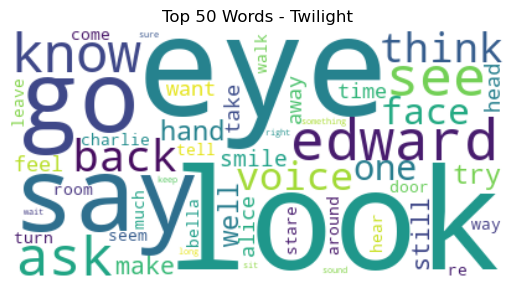

In [123]:
def to_string(tokens): 
    string = ""
    for i in tokens:
        string = string + " " +i
    return string

wordcloud_Twilight = WordCloud(max_words = 50,
                           background_color = "white", 
                           collocations=False).generate(to_string(twilight_lemma))
plt.imshow(wordcloud_Twilight, interpolation='bilinear')
plt.axis("off")
plt.title('Top 50 Words - Twilight')
plt.show;

#### 3.1.2. WordCloud: New Moon

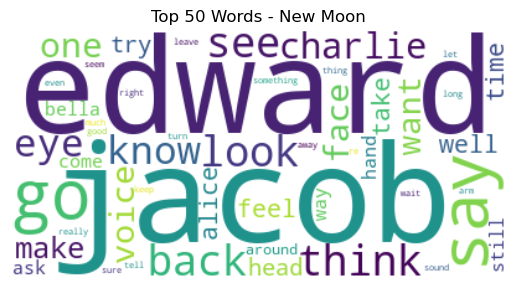

In [124]:
wordcloud_New_Moon = WordCloud(max_words = 50,
                           background_color = "white", 
                           collocations=False).generate(to_string(new_moon_lemma))
plt.imshow(wordcloud_New_Moon, interpolation='bilinear')
plt.axis("off")
plt.title('Top 50 Words - New Moon')
plt.show;

#### 3.1.3 WordCloud: Eclipse

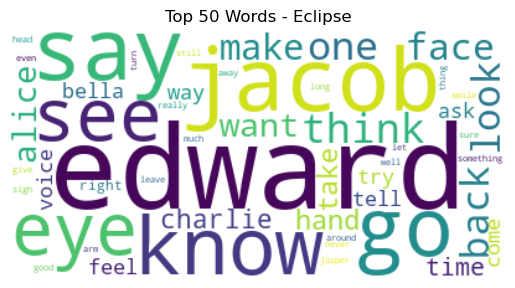

In [125]:
wordcloud_Eclipse = WordCloud(max_words = 50,
                           background_color = "white", 
                           collocations=False).generate(to_string(eclipse_lemma))
plt.imshow(wordcloud_Eclipse, interpolation='bilinear')
plt.axis("off")
plt.title('Top 50 Words - Eclipse')
plt.show;

#### 3.1.4 WordCloud: Breaking Dawn

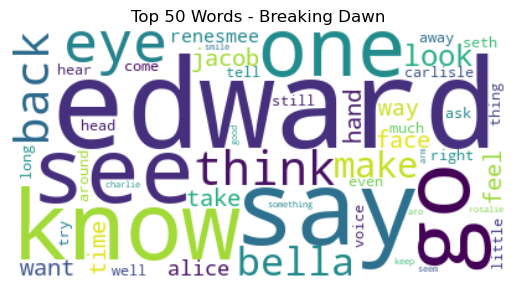

In [126]:
wordcloud_Breaking_Dawn = WordCloud(max_words = 50,
                           background_color = "white", 
                           collocations=False).generate(to_string(breaking_dawn_lemma))
plt.imshow(wordcloud_Breaking_Dawn, interpolation='bilinear')
plt.axis("off")
plt.title('Top 50 Words - Breaking Dawn')
plt.show;

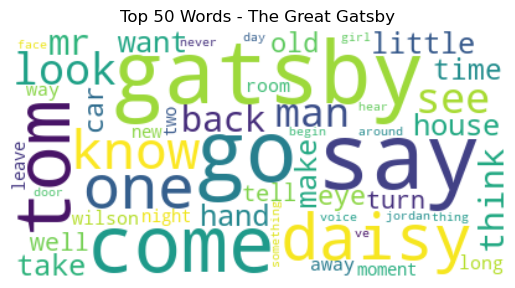

In [127]:
wordcloud_tgg = WordCloud(max_words = 50,
                           background_color = "white", 
                           collocations=False).generate(to_string(tgg_lemma))
plt.imshow(wordcloud_tgg, interpolation='bilinear')
plt.axis("off")
plt.title('Top 50 Words - The Great Gatsby')
plt.show;

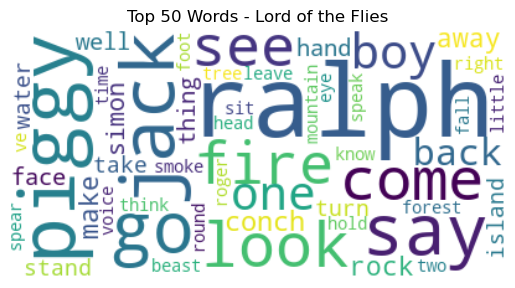

In [128]:
wordcloud_lof = WordCloud(max_words = 50,
                           background_color = "white", 
                           collocations=False).generate(to_string(lof_lemma))
plt.imshow(wordcloud_lof, interpolation='bilinear')
plt.axis("off")
plt.title('Top 50 Words - Lord of the Flies')
plt.show;

Twilight Saga is written from first-person point of view. Bella, the narrator, describes series of events from her perspective (As a result, we can see many "Edward" and "Jacob."). But, this writing style is not very unique. Even The Great Gatsby is also written in this narrative style. In The Great Gatsby, Nick Carraway depicts the surroundings and interactions between the characters as an observer as well. 

We can find two major criticisms on Meyer's writing about this narrative style. 
First, too many dialogues. A famous French author, Charles Dantzig, publicly criticizes this book in his book, "Why Read?" as below;

"I tried to read Twilight, it's too hard. Stephenie Meyer has 84,999,999 readers left of these novels which are neither good nor bad, they suck. Dialogues are just questions are answers, ' Do you go to high school, Bella? - Yes, Edward, I go to school', and so on, it's too much effort, Wittgenstein is easier, I assure you. The Twilight manuscript was refused by fourteen agents before being published. Alas, there is always a fifteenth agent. [...] Thus was born Twilight, the first vampire novel not made with blood, but with turnip."

Moreover, the dialogues or thoughts of Bella often are not even related to the overall plot of this series. Twilight series is known for majorly focusing on explaining how attractive the vampires's physical appearances are,  which is another the most common criticism this series faces. Many critics argue that Stephenie Meyer spent too much time on explaining the characters' external appearances rather than descibing the emontional interactions inbetween characters. From the wordclouds of Twilight saga above, we can find the repetition of "smile," "face," "voice," and "eyes." This proves how many vocabularies Meyer used just to decribe the attractiveness of the fictional characters in her writing. Meyer did not provide sufficient reasons for why Bella is not afraid of the Vampires, which leads the series to face a huge issue of underdeveloped characters and bad plots as well. 

### 3.2. Sentiment Analysis With Vader

In [130]:
def list_score(text_lemma):
    score_lst = []
    for token in text_lemma:
        score = SentimentIntensityAnalyzer().polarity_scores(token)["compound"]
        score_lst.append(score)
    return score_lst

twilight_score = list_score(twilight_lemma)
new_moon_score = list_score(new_moon_lemma)
eclipse_score = list_score(eclipse_lemma)
breaking_dawn_score = list_score(breaking_dawn_lemma)
tgg_score = list_score(tgg_lemma)
lof_score = list_score(lof_lemma)

### 3.2.1. Changing List into Data Frame

In [131]:
twilight_data_frame = pd.DataFrame(data = {"Word": twilight_lemma,
                                           "Sentiment Score": twilight_score})
new_moon_data_frame = pd.DataFrame(data = {"Word": new_moon_lemma,
                                           "Sentiment Score": new_moon_score})
eclipse_data_frame = pd.DataFrame(data = {"Word": eclipse_lemma,
                                          "Sentiment Score": eclipse_score})
breaking_dawn_data_frame = pd.DataFrame(data = {"Word": breaking_dawn_lemma,
                                                "Sentiment Score": breaking_dawn_score})
tgg_data_frame = pd.DataFrame(data = {"Word": tgg_lemma,
                                                "Sentiment Score": tgg_score})
lof_data_frame = pd.DataFrame(data = {"Word": lof_lemma,
                                                "Sentiment Score": lof_score})

In [132]:
def sentiment_change(data_frame):
    text_sentiment = []
    for token in data_frame["Sentiment Score"]:
        if token > 0:
            text_sentiment.append("Positive")
        elif token == 0:
            text_sentiment.append("Neutral")
        else:
            text_sentiment.append("Negative")
    return text_sentiment
        
twilight_data_frame["Sentiment"] = sentiment_change(twilight_data_frame)
new_moon_data_frame["Sentiment"] = sentiment_change(new_moon_data_frame)
eclipse_data_frame["Sentiment"] = sentiment_change(eclipse_data_frame)
breaking_dawn_data_frame["Sentiment"] = sentiment_change(breaking_dawn_data_frame)
tgg_data_frame["Sentiment"] = sentiment_change(tgg_data_frame)
lof_data_frame["Sentiment"] = sentiment_change(lof_data_frame)

### 4. Data Visualization

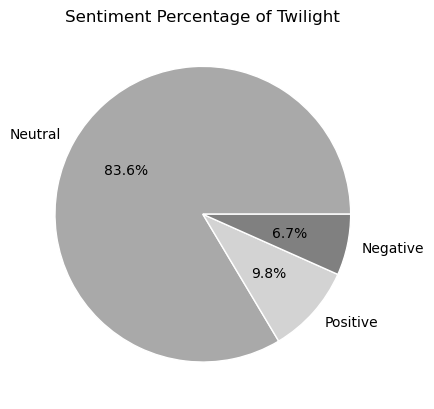

           count
Sentiment       
Neutral    50672
Positive    5912
Negative    4047 


          Word  Sentiment Score Sentiment
0        first              0.0   Neutral
1        sight              0.0   Neutral
2       mother              0.0   Neutral
3        drive              0.0   Neutral
4      airport              0.0   Neutral
...        ...              ...       ...
60626     lean              0.0   Neutral
60627    press              0.0   Neutral
60628     cold              0.0   Neutral
60629      lip              0.0   Neutral
60630   throat              0.0   Neutral

[60631 rows x 3 columns]


In [133]:
count_twilight = twilight_data_frame["Sentiment"].value_counts().to_frame()
plt.pie(count_twilight["count"], labels = count_twilight.index,
        autopct = '%1.1f%%',
        colors = ["darkgrey", "lightgrey", "grey"],
        wedgeprops = {"edgecolor" : "white",'linewidth': 1, 'antialiased': True})
plt.title("Sentiment Percentage of Twilight")
plt.show();
print(count_twilight, "\n\n")
print(twilight_data_frame)

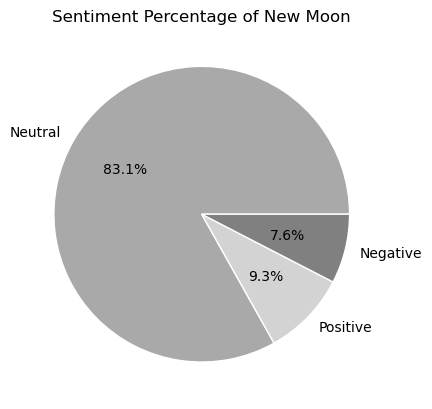

           count
Sentiment       
Neutral    44148
Positive    4927
Negative    4026 


             Word  Sentiment Score Sentiment
0           party           0.4019  Positive
1      ninetynine           0.0000   Neutral
2           point           0.0000   Neutral
3            nine           0.0000   Neutral
4         percent           0.0000   Neutral
...           ...              ...       ...
53096        meet           0.0000   Neutral
53097        fate           0.0000   Neutral
53098     destiny           0.0000   Neutral
53099     solidly           0.0000   Neutral
53100        side           0.0000   Neutral

[53101 rows x 3 columns]


In [134]:
count_new_moon = new_moon_data_frame["Sentiment"].value_counts().to_frame()
plt.pie(count_new_moon["count"], labels = count_new_moon.index,
        autopct = '%1.1f%%',
        colors = ["darkgrey", "lightgrey", "grey"],
        wedgeprops = {"edgecolor" : "white",'linewidth': 1, 'antialiased': True})
plt.title("Sentiment Percentage of New Moon")
plt.show();
print(count_new_moon, "\n\n")
print(new_moon_data_frame)

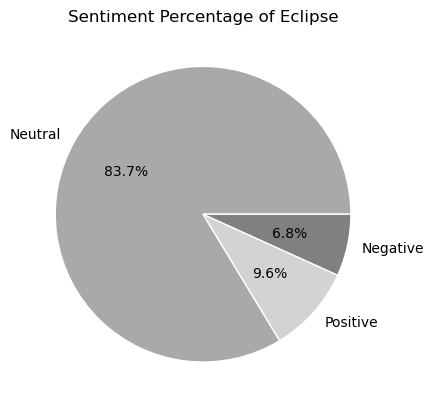

           count
Sentiment       
Neutral    68055
Positive    7773
Negative    5508 


            Word  Sentiment Score Sentiment
0      ultimatum           0.0000   Neutral
1          bella           0.0000   Neutral
2             do           0.0000   Neutral
3            not           0.0000   Neutral
4           know           0.0000   Neutral
...          ...              ...       ...
81331        let           0.0000   Neutral
81332      jacob           0.0000   Neutral
81333      black           0.0000   Neutral
81334  disappear          -0.2263  Negative
81335     behind           0.0000   Neutral

[81336 rows x 3 columns]


In [135]:
count_eclipse = eclipse_data_frame["Sentiment"].value_counts().to_frame()
plt.pie(count_eclipse["count"], labels = count_eclipse.index,
        autopct = '%1.1f%%',
        colors = ["darkgrey", "lightgrey", "grey"],
        wedgeprops = {"edgecolor" : "white",'linewidth': 1, 'antialiased': True})
plt.title("Sentiment Percentage of Eclipse")
plt.show();
print(count_eclipse, "\n\n")
print(eclipse_data_frame)

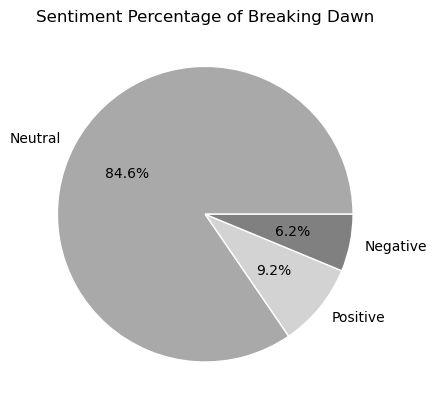

           count
Sentiment       
Neutral    86396
Positive    9398
Negative    6386 


              Word  Sentiment Score Sentiment
0           engage           0.3400  Positive
1              one           0.0000   Neutral
2            stare           0.0000   Neutral
3          promise           0.3182  Positive
4              one           0.0000   Neutral
...            ...              ...       ...
102175  blissfully           0.0000   Neutral
102176       small           0.0000   Neutral
102177     perfect           0.5719  Positive
102178       piece           0.0000   Neutral
102179     forever           0.0000   Neutral

[102180 rows x 3 columns]


In [136]:
count_breaking_dawn = breaking_dawn_data_frame["Sentiment"].value_counts().to_frame()
plt.pie(count_breaking_dawn["count"], labels = count_breaking_dawn.index,
        autopct = '%1.1f%%',
       colors = ["darkgrey", "lightgrey", "grey"],
        wedgeprops = {"edgecolor" : "white",'linewidth': 1, 'antialiased': True})
plt.title("Sentiment Percentage of Breaking Dawn")
plt.show();
print(count_breaking_dawn, "\n\n")
print(breaking_dawn_data_frame)

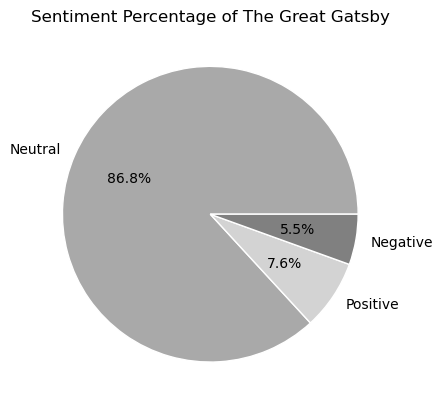

           count
Sentiment       
Neutral    21590
Positive    1901
Negative    1371 


              Word  Sentiment Score Sentiment
0          chapter           0.0000   Neutral
1            young           0.0000   Neutral
2       vulnerable          -0.2263  Negative
3             year           0.0000   Neutral
4           father           0.0000   Neutral
...            ...              ...       ...
24857      current           0.0000   Neutral
24858         bear           0.0000   Neutral
24859         back           0.0000   Neutral
24860  ceaselessly           0.0000   Neutral
24861         past           0.0000   Neutral

[24862 rows x 3 columns]


In [137]:
count_tgg = tgg_data_frame["Sentiment"].value_counts().to_frame()
plt.pie(count_tgg["count"], labels = count_tgg.index,
        autopct = '%1.1f%%',
        colors = ["darkgrey", "lightgrey", "grey"],
        wedgeprops = {"edgecolor" : "white",'linewidth': 1, 'antialiased': True})
plt.title("Sentiment Percentage of The Great Gatsby")
plt.show();
print(count_tgg, "\n\n")
print(tgg_data_frame)

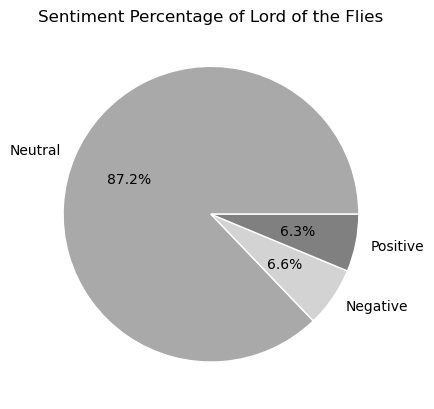

           count
Sentiment       
Neutral    27726
Negative    2087
Positive    1995 


           Word  Sentiment Score Sentiment
0       chapter              0.0   Neutral
1           one              0.0   Neutral
2         sound              0.0   Neutral
3         shell              0.0   Neutral
4           boy              0.0   Neutral
...         ...              ...       ...
31803       eye              0.0   Neutral
31804      rest              0.0   Neutral
31805      trim              0.0   Neutral
31806   cruiser              0.0   Neutral
31807  distance              0.0   Neutral

[31808 rows x 3 columns]


In [138]:
count_lof = lof_data_frame["Sentiment"].value_counts().to_frame()
plt.pie(count_lof["count"], labels = count_lof.index,
        autopct = '%1.1f%%',
        colors = ["darkgrey", "lightgrey", "grey"],
        wedgeprops = {"edgecolor" : "white",'linewidth': 1, 'antialiased': True})
plt.title("Sentiment Percentage of Lord of the Flies")
plt.show();
print(count_lof, "\n\n")
print(lof_data_frame)

The sentiment Analysis data shows a quite interesting outcome.

The average percentage of `Neutral` words in Twilight Saga: `83.75%`

The average percentage of `Negative` words in Twilight Saga: `6.825%`

The average percentage of `Positive` words in Twilight Saga: `9.475%`
 


The average percentage of `Neutral` words from the other two books: `87.00%`

The average percentage of `Negative` words from the other two books: `5.90%`

The average percentage of `Positive` words from the other two books: `7.10%`



The Twilight series shows significantly lower number in `Neutral` words percentage, and significantly higher numbers in `negative` and `positive` words. 

After the sentiment analysis of these six books above, we can tell the Twilight series consists of more sentimental vocabularies. Though further researches must be done to lead us to a more robust conclusion. My thought about this result is that the Twilight series abused sentimental vocabularies to drag more attention from its target audience. Due to my lack of understanding in literary writing, I am not certain if it is a good or bad, but here's my interpretation.

The Twilight saga is just like fastfood; strong-tasting food is more popular among general public. People look for something that can easily appetize them. On the other hands, The Great Gatsby and Lord of the Flies can be perceived as a fine dining. The completion or composion of each ingredient are better, but it's harder to access. They use more diverse and high-quality ingredients (vocabularies), and have a higher quality of flavor expression. With less sentimental vocabularies, they may be not as stimulating as the Twilight Saga, but have better reviews from literary enthusiasts. 

### Conclusion
I could succesfully discover some distinct differences between the Twilight Saga and other two novels, The Great Gatsby and Lord of the Flies. The interpretation from the data can be subjective, but, based on my hypothesis, I could conclude what made the Twilight series popular among its target audience, and also a bad writing. 

Key Notes:
1. The Twilight Series displays significantly low lexical diversities in its vocabulary usages
2. The wordcloud partially support the idea that Meyer is a poor writer
3. The wordcloud displays Meyer's enthusiasms in describing physical appearance of the fictional characters
3. The Twilight Series displays abusing of sentimental vocabularies

#### Reference
Meyer, Stephenie. The Twilight Saga. Little, Brown & Company, 2011.

Fitzgerald, F. Scott (Francis Scott), 1896-1940. The Great Gatsby. New York :C. Scribner's sons, 1925.

Golding, William, 1911-1993. Lord of the Flies. New York :Perigee, 1954.

Dantzig, Charles. Why Read? Translated by Renuka George, Yoda Press, 2018. 